In [1]:
import os
os.chdir('C:/Users/USER/Downloads/데이터')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
wd=pd.read_csv('원달러환율.csv')

In [4]:
wd=wd.iloc[:,3:]

In [5]:
# 환율이 결측치인 경우 전일의 환율로 대치 
wd=wd.T.fillna(method='ffill')

In [6]:
wd

,0
1990/03/02,694.0
1990/03/03,694.0
1990/03/05,693.5
1990/03/06,695.4
1990/03/07,697.5
...,...
2021/09/06,1155.0
2021/09/07,1157.1
2021/09/08,1163.0
2021/09/09,1167.5


In [7]:
wd.columns=['원달러환율']

In [8]:
wd['20일이평'] =wd['원달러환율'].rolling(window=20).mean()

In [9]:
wd['60일이평'] =wd['원달러환율'].rolling(window=60).mean()

In [10]:
wd['120일이평'] =wd['원달러환율'].rolling(window=120).mean()

In [11]:
wd=wd.dropna()

In [12]:
wd

,원달러환율,20일이평,60일이평,120일이평
1990/07/27,715.5,716.080,714.785000,708.862500
1990/07/28,715.5,716.055,714.896667,709.041667
1990/07/30,714.9,716.000,714.990000,709.215833
1990/07/31,714.8,715.915,715.080000,709.393333
1990/08/01,713.9,715.785,715.155000,709.547500
...,...,...,...,...
2021/09/06,1155.0,1163.220,1147.785000,1134.490833
2021/09/07,1157.1,1163.750,1148.465000,1134.779167
2021/09/08,1163.0,1164.525,1149.223333,1135.065000
2021/09/09,1167.5,1165.225,1150.041667,1135.369167


In [22]:
wd['이평평균']=wd.iloc[:,1:].mean(1)

C:\Users\USER\AppData\Local\Temp/ipykernel_6668/3097475082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd['이평평균']=wd.iloc[:,1:].mean(1)


In [26]:
wd

,원달러환율,20일이평,60일이평,120일이평,이평평균
1990/07/27,715.5,716.080,714.785000,708.862500,713.242500
1990/07/28,715.5,716.055,714.896667,709.041667,713.331111
1990/07/30,714.9,716.000,714.990000,709.215833,713.401944
1990/07/31,714.8,715.915,715.080000,709.393333,713.462778
1990/08/01,713.9,715.785,715.155000,709.547500,713.495833
...,...,...,...,...,...
2021/09/06,1155.0,1163.220,1147.785000,1134.490833,1148.498611
2021/09/07,1157.1,1163.750,1148.465000,1134.779167,1148.998056
2021/09/08,1163.0,1164.525,1149.223333,1135.065000,1149.604444
2021/09/09,1167.5,1165.225,1150.041667,1135.369167,1150.211944


<AxesSubplot:>

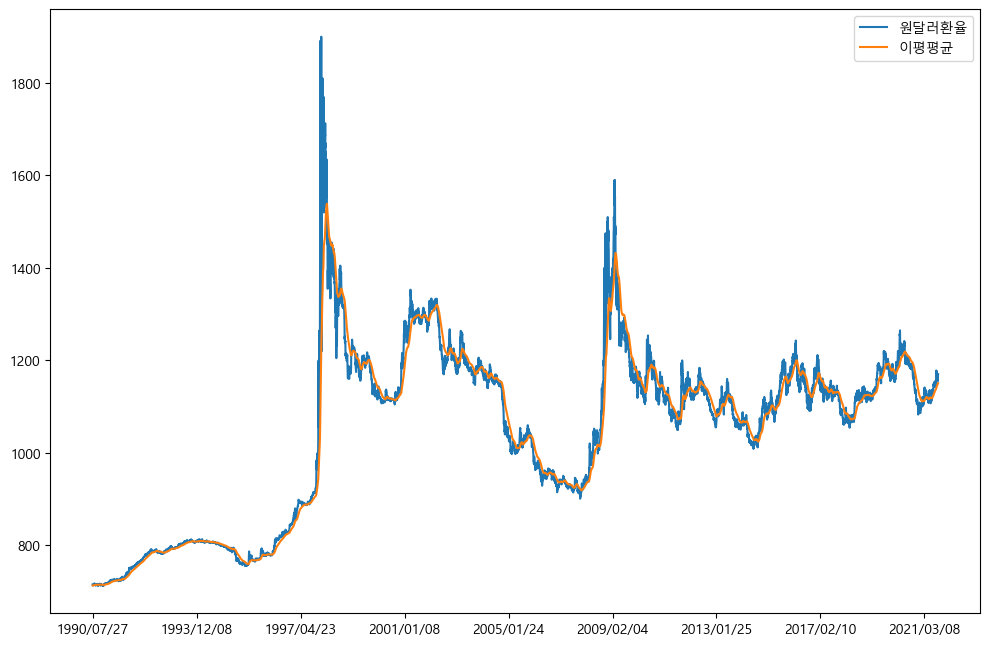

In [27]:
plt.rc('font',family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
wd.loc[:,['원달러환율','이평평균']].plot()

<AxesSubplot:>

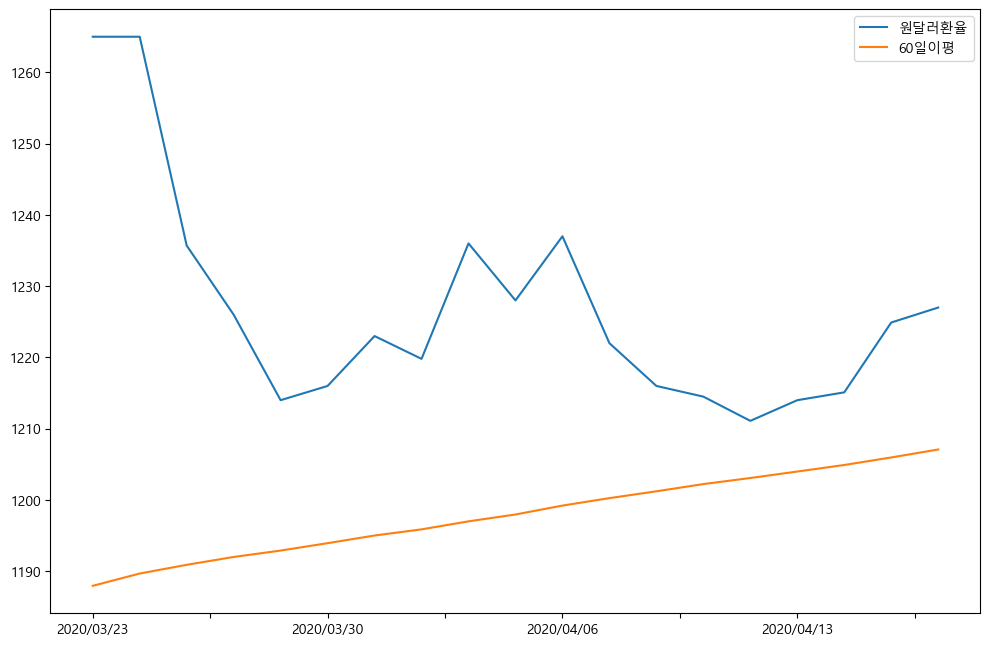

In [48]:
wd.loc['2020/03/21':'2020/04/19',['원달러환율','60일이평']].plot()

In [46]:
(wd.loc['2020/03/23','원달러환율']-wd.loc['2020/03/23','60일이평'])/wd.loc['2020/03/23','60일이평']

0.06485664420038922

In [ ]:
한국무역협회의 이석재 외환 전문위원이 따르면 종가기준 작년 3월 19일 괴리도가 높다고 했다. 
개인적으로 한국은행경제통계시스템에서 시가를 기반으로 분석하면 20/03/23에 괴리율은 6.48%로 상당히 높다.